In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.stats as stats  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 1. Data Understanding & Cleaning

In [2]:
students = pd.read_csv(r'C:\Users\user\Documents\Predictive Analytics\StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {students[col].unique()}")


Unique values in gender: ['female' 'male']

Unique values in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in lunch: ['standard' 'free/reduced']

Unique values in test preparation course: ['none' 'completed']


In [7]:
students.duplicated().sum()

0

In [8]:
students = students.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [9]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group b,bachelor's degree,standard,none,72,72,74
1,female,group c,some college,standard,completed,69,90,88
2,female,group b,master's degree,standard,none,90,95,93
3,male,group a,associate's degree,free/reduced,none,47,57,44
4,male,group c,some college,standard,none,76,78,75


# 2. Summary Statistics

In [10]:
# Summary statistics for numerical columns
summary_stats = students[['math score', 'reading score', 'writing score']].describe()
print(summary_stats)

# Calculate mode separately (since describe() does not include it)
mode_values = students[['math score', 'reading score', 'writing score']].mode()
print("\nMode values:\n", mode_values)

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Mode values:
    math score  reading score  writing score
0          65             72             74


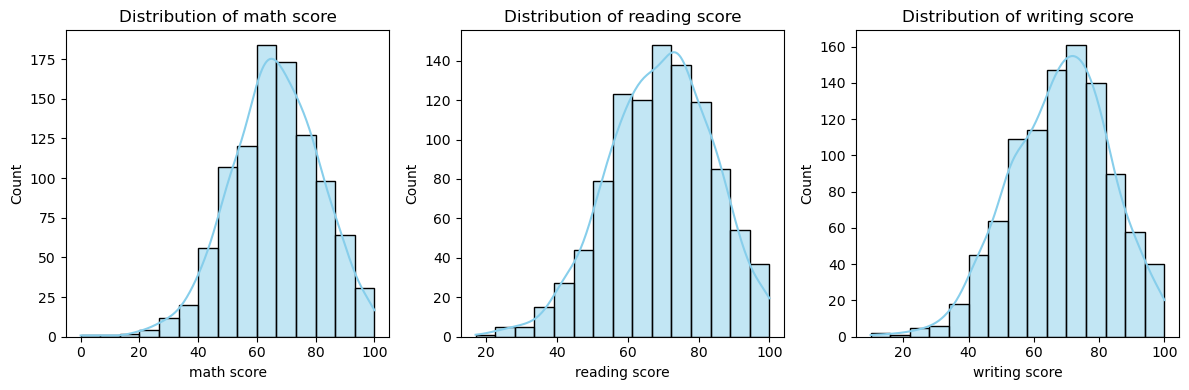

In [11]:
# Plot histograms for all three scores to check for the distribution
plt.figure(figsize=(12, 4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(students[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

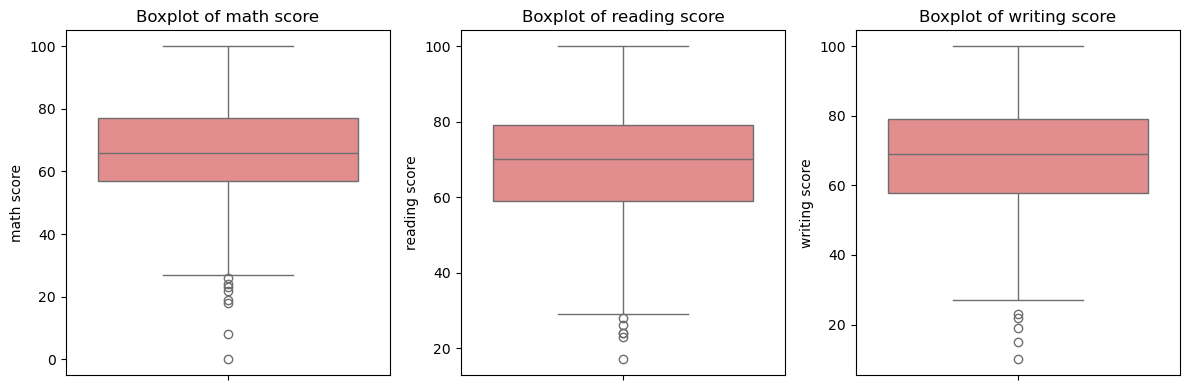

In [12]:
# Boxplots for each score category to check for the outliers
plt.figure(figsize=(12, 4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=students[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [13]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Checking outliers in all three score columns
for col in ['math score', 'reading score', 'writing score']:
    outlier_data = detect_outliers(students, col)
    print(f"\nOutliers in {col}:\n", outlier_data)


Outliers in math score:
      gender race/ethnicity parental level of education         lunch  \
17   female        group b            some high school  free/reduced   
59   female        group c            some high school  free/reduced   
145  female        group c                some college  free/reduced   
338  female        group b            some high school  free/reduced   
466  female        group d          associate's degree  free/reduced   
787  female        group b                some college      standard   
842  female        group b                 high school  free/reduced   
980  female        group b                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          

In [14]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return df

# Apply capping to math, reading, and writing scores
for col in ['math score', 'reading score', 'writing score']:
    students = cap_outliers(students, col)

# Confirm if outliers are handled
for col in ['math score', 'reading score', 'writing score']:
    print(f"New min value for {col}: {students[col].min()}")

New min value for math score: 27.0
New min value for reading score: 29.0
New min value for writing score: 25.875


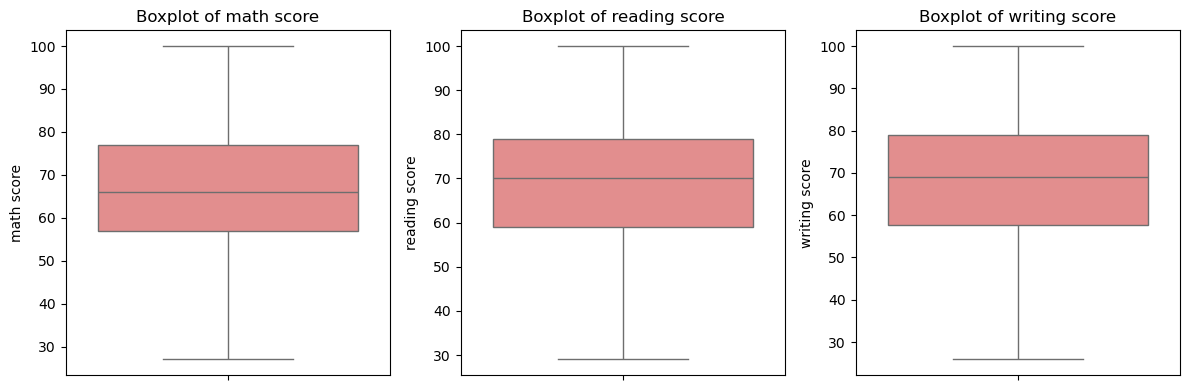

In [15]:
# reploting the boxplots to check if there are any outlier remaining
plt.figure(figsize=(12, 4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=students[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3. Data Visualization

## 3.1 Categorical vs. Scores

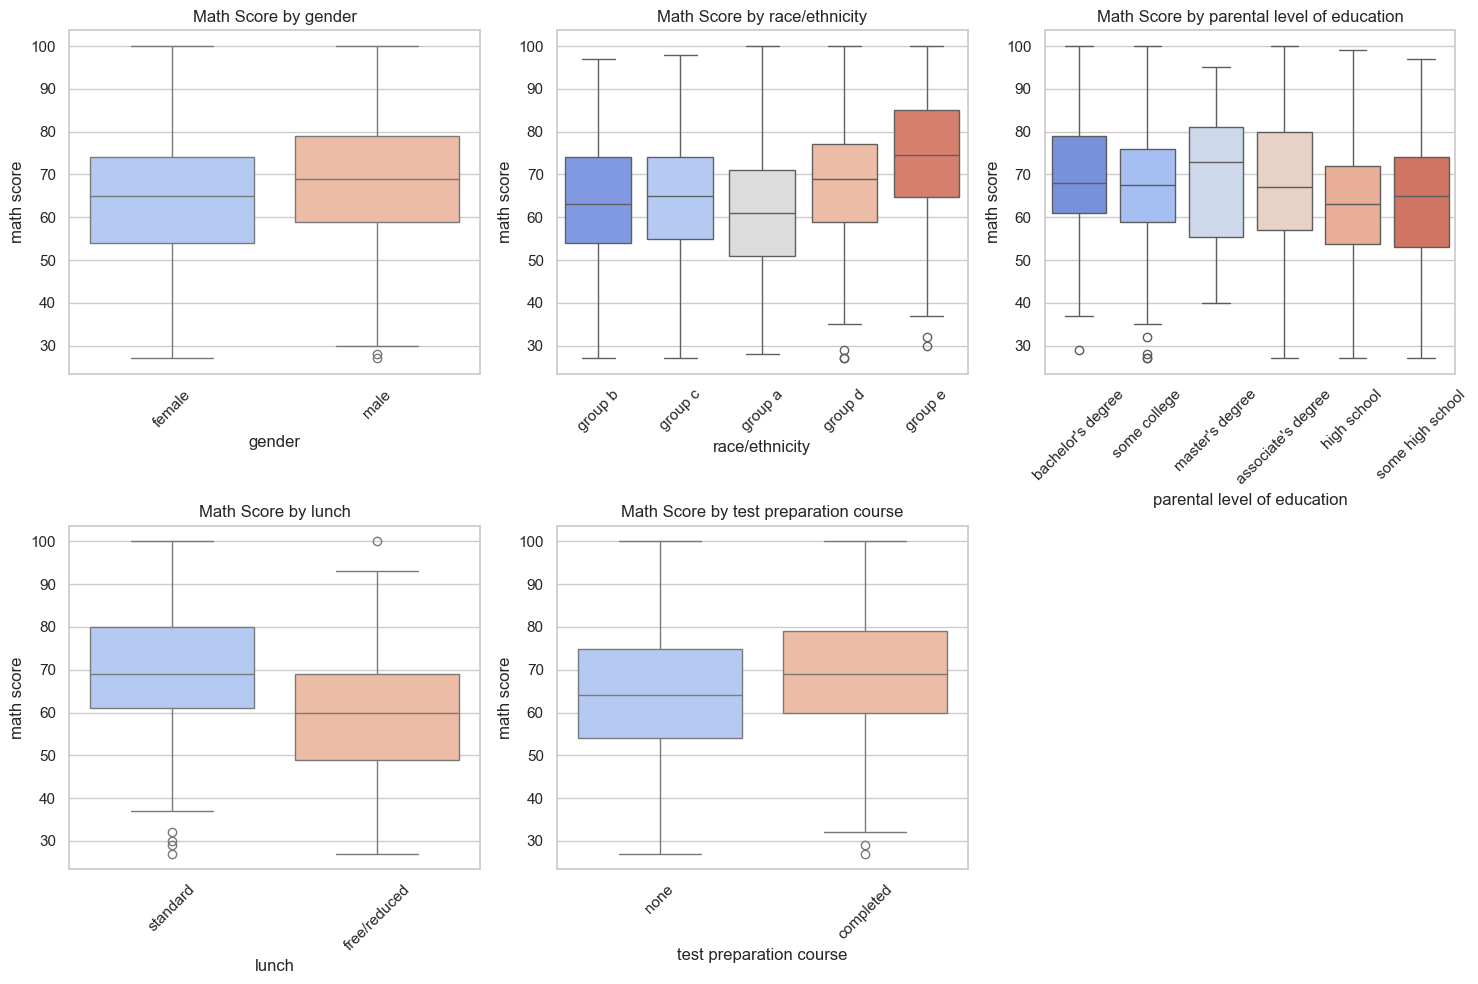

In [16]:
# Set style
sns.set(style="whitegrid")

# Define categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
score_cols = ['math score', 'reading score', 'writing score']

# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y='math score', data=students, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Math Score by {col}")

plt.tight_layout()
plt.show()

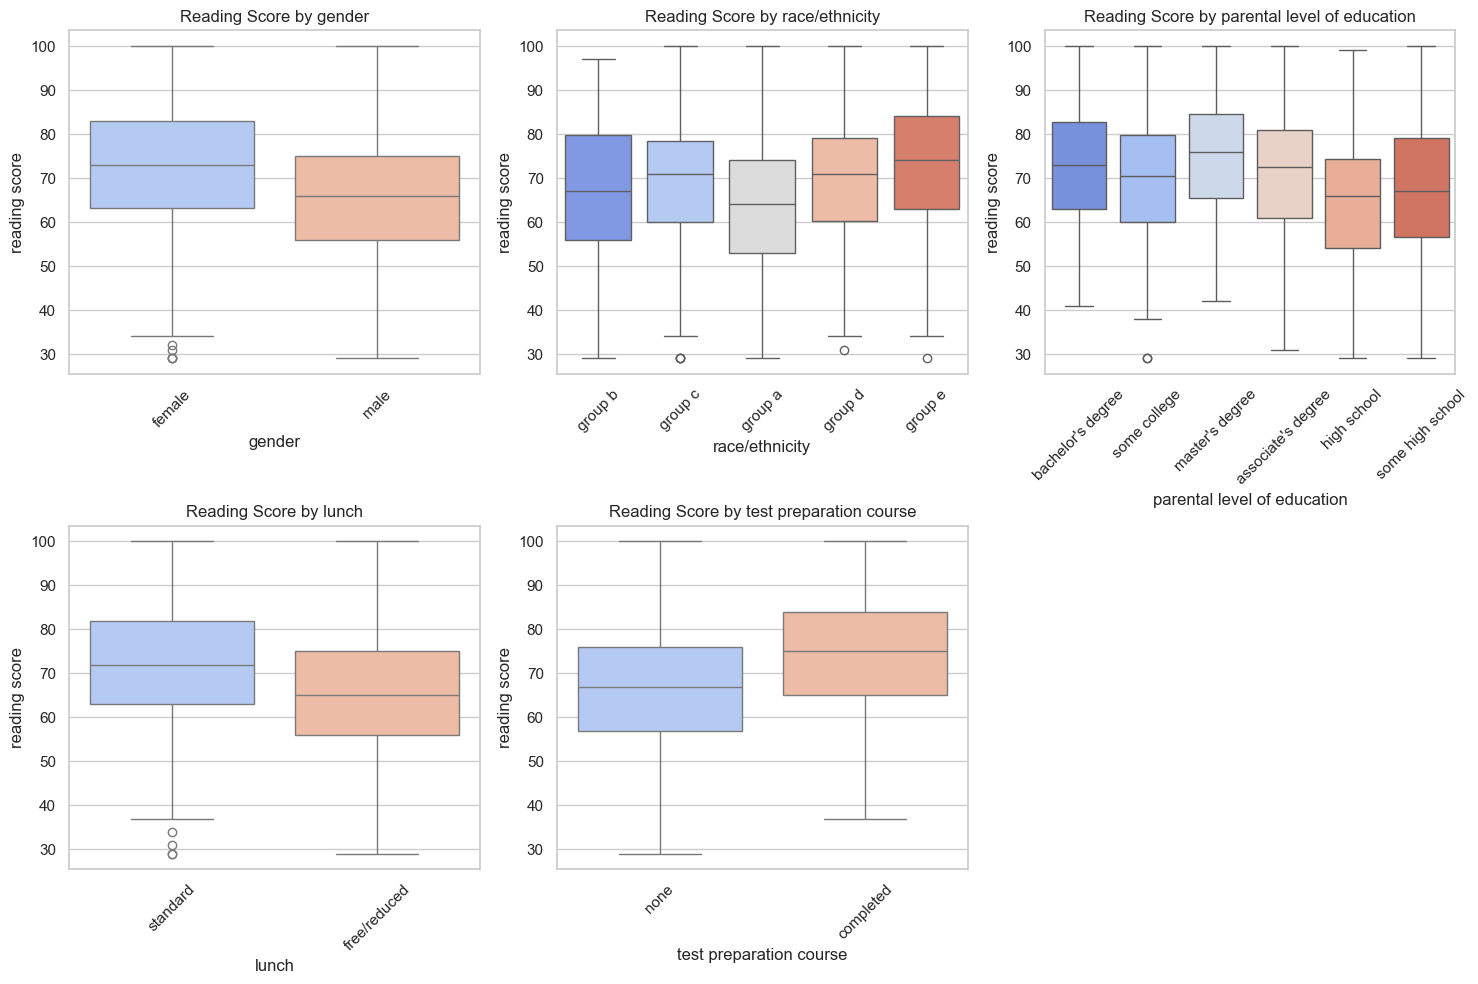

In [17]:
# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y='reading score', data=students, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Reading Score by {col}")

plt.tight_layout()
plt.show()

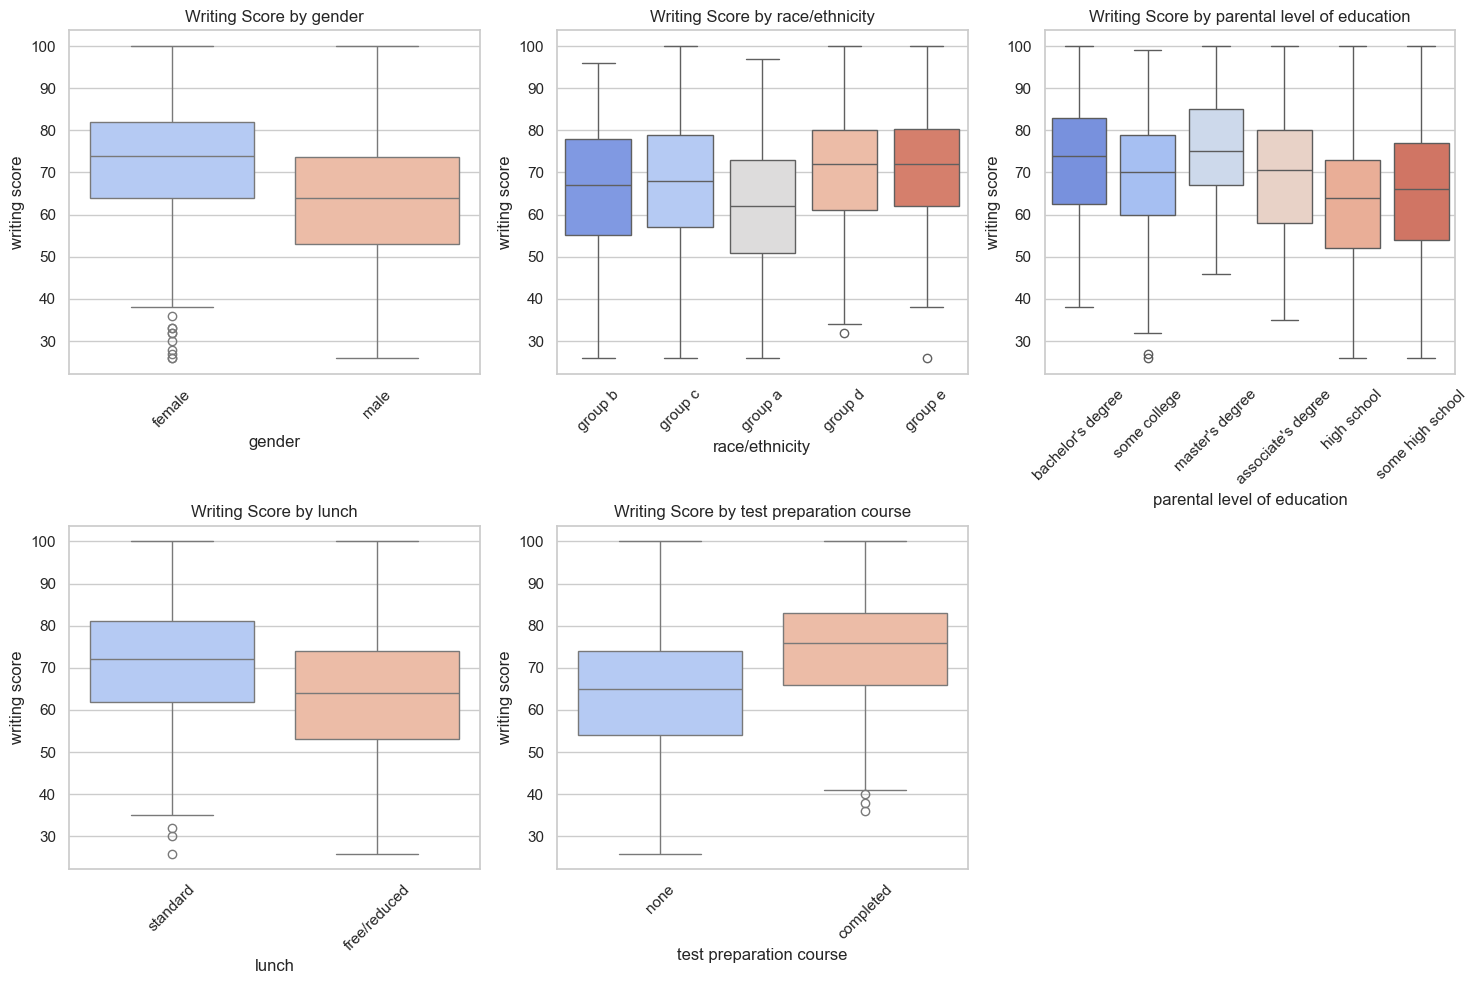

In [18]:
# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y='writing score', data=students, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Writing Score by {col}")

plt.tight_layout()
plt.show()

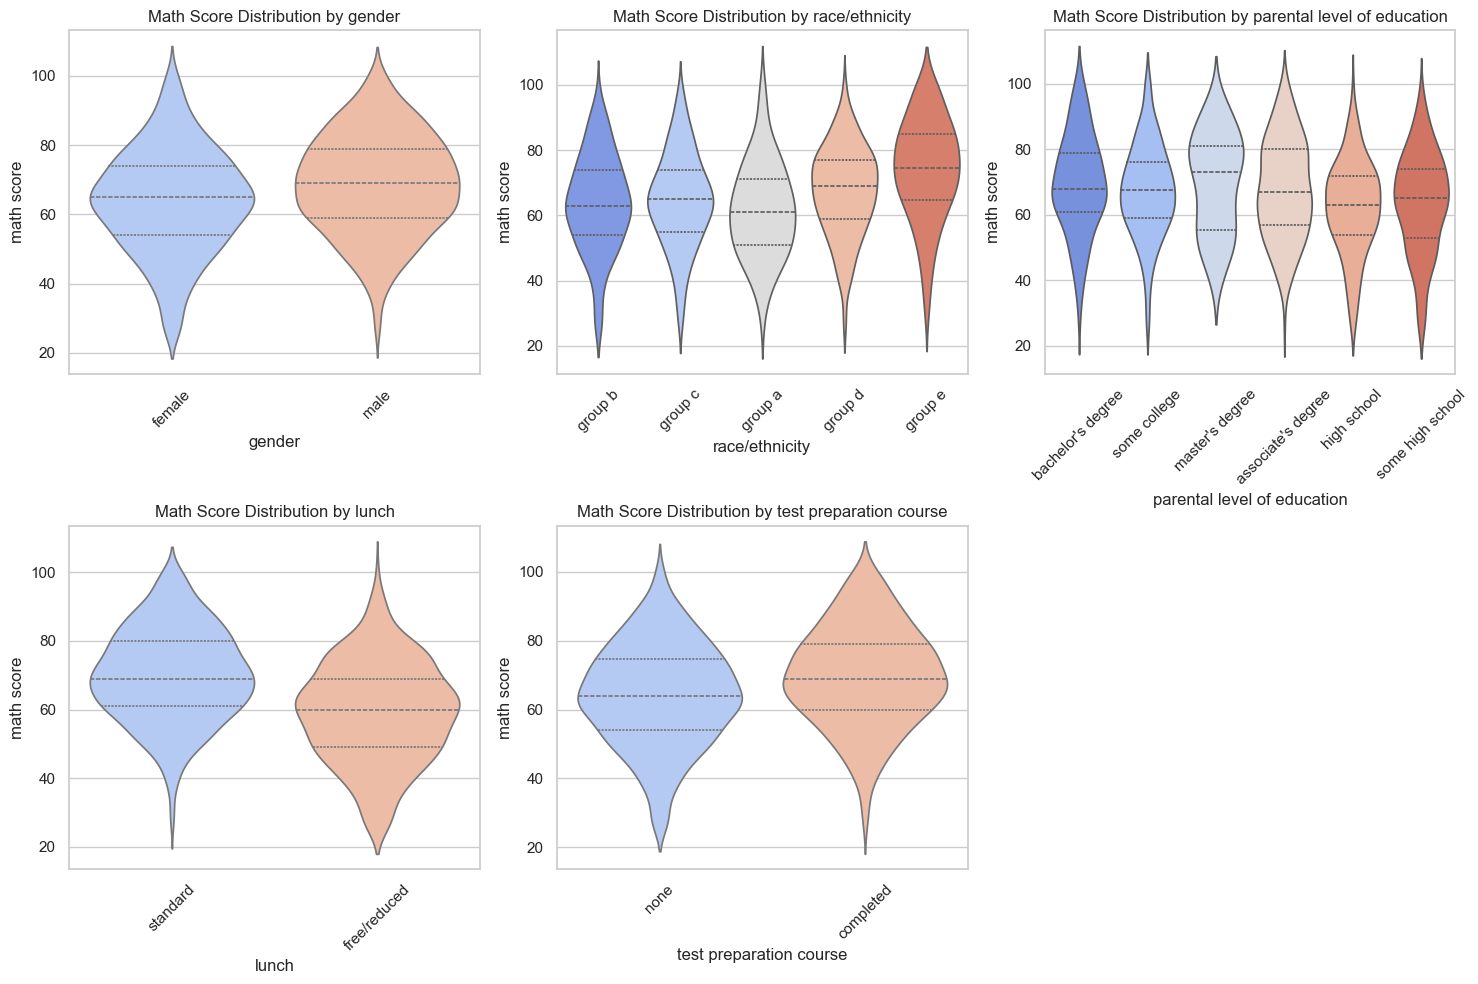

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=col, y='math score', data=students, palette="coolwarm", inner="quartile")
    plt.xticks(rotation=45)
    plt.title(f"Math Score Distribution by {col}")

plt.tight_layout()
plt.show()

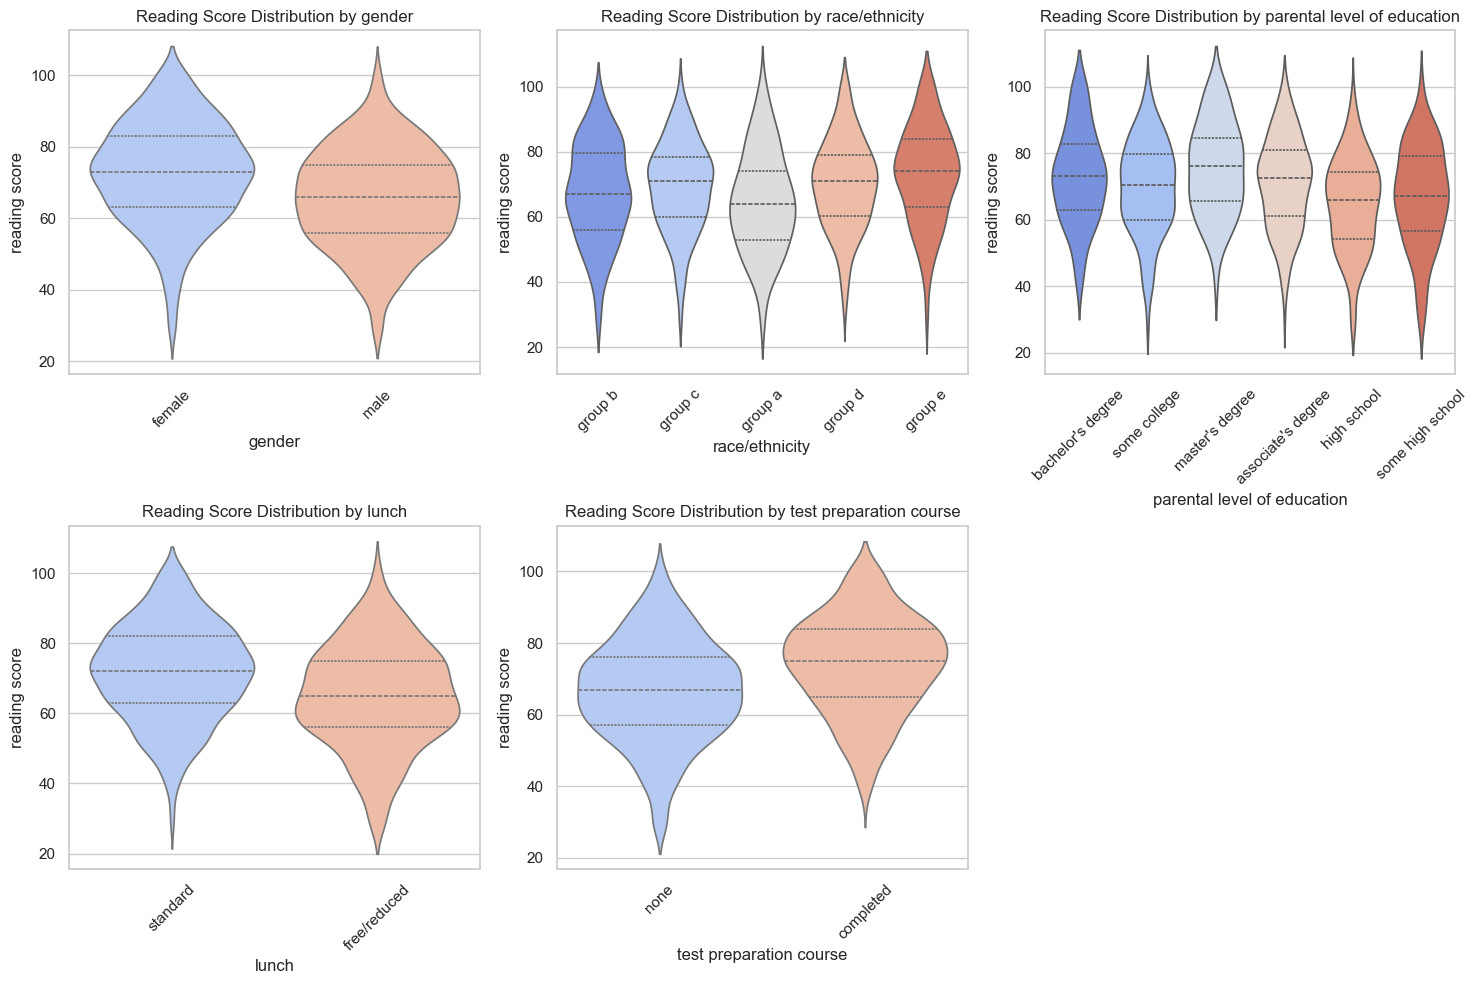

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=col, y='reading score', data=students, palette="coolwarm", inner="quartile")
    plt.xticks(rotation=45)
    plt.title(f"Reading Score Distribution by {col}")

plt.tight_layout()
plt.show()

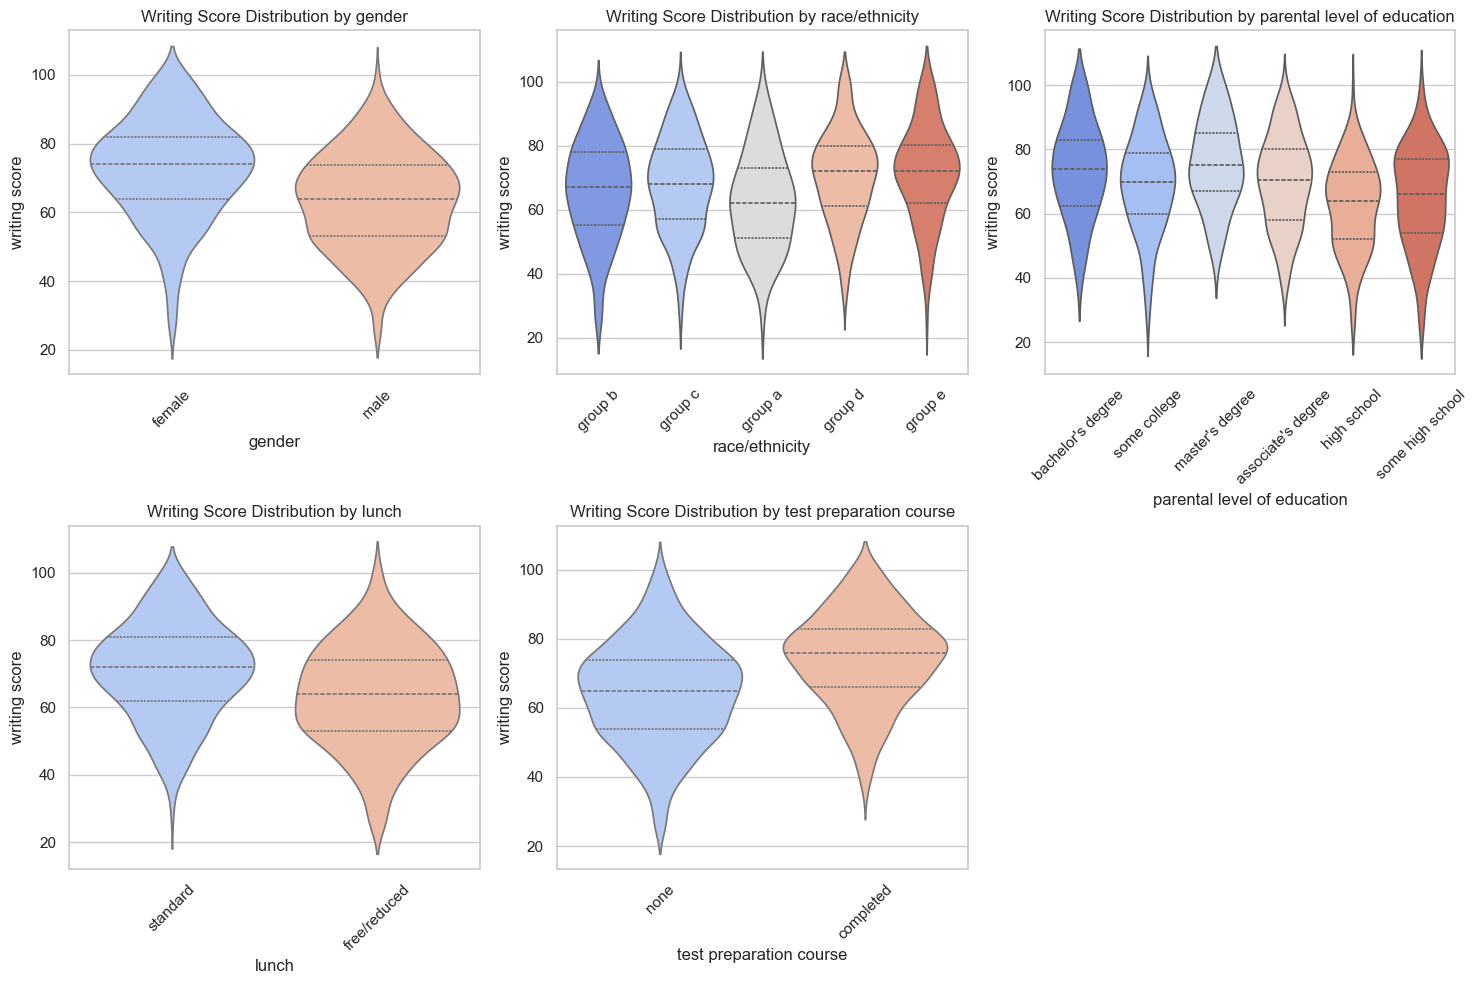

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=col, y='writing score', data=students, palette="coolwarm", inner="quartile")
    plt.xticks(rotation=45)
    plt.title(f"Writing Score Distribution by {col}")

plt.tight_layout()
plt.show()

## 3.2 Score Correlations

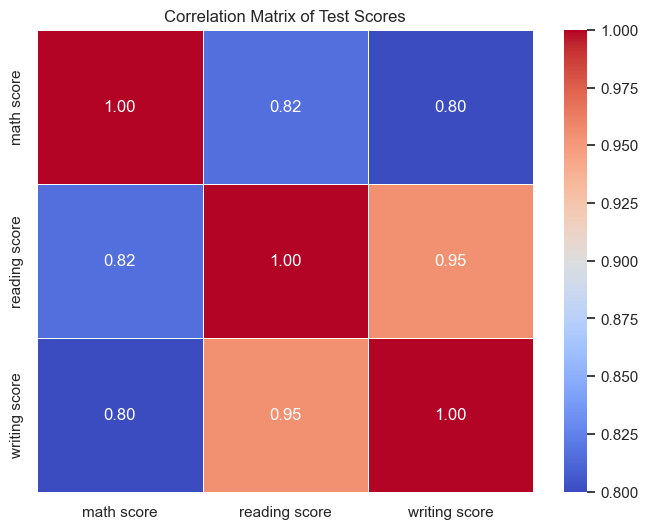

In [22]:
import numpy as np

# Compute correlation matrix
corr_matrix = students[score_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Test Scores")
plt.show()

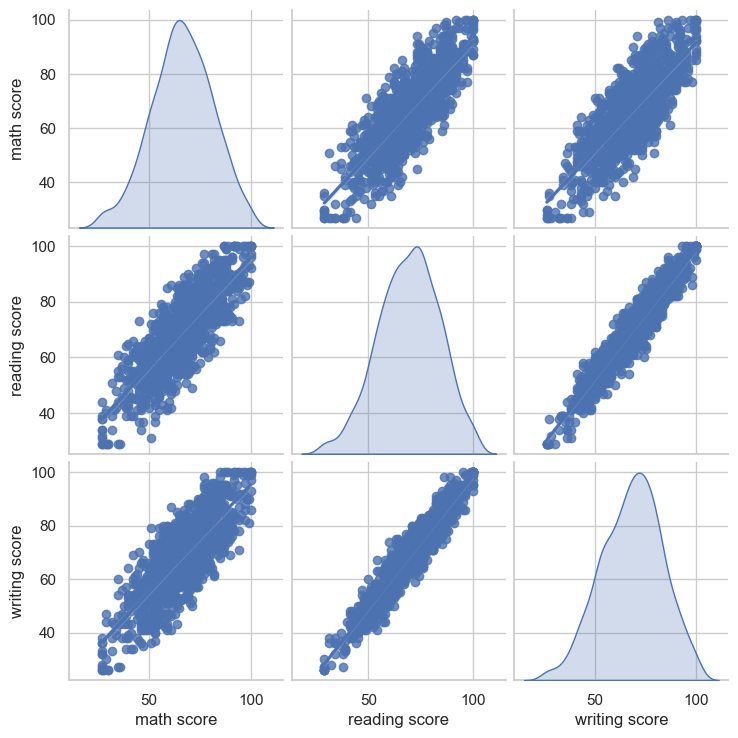

In [23]:
sns.pairplot(students, vars=score_cols, kind="reg", diag_kind="kde", palette="coolwarm")
plt.show()

# 4. Feature Relationships & Insights

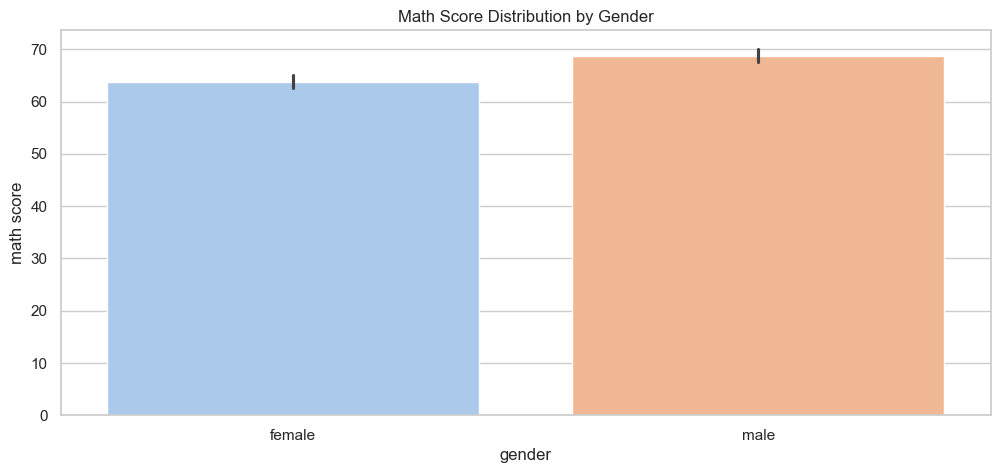

In [24]:
# 1. Gender & Scores - Box Plot
plt.figure(figsize=(12, 5))
sns.barplot(x="gender", y="math score", data=students, palette="pastel")
plt.title("Math Score Distribution by Gender")
plt.show()

<Figure size 1200x600 with 0 Axes>

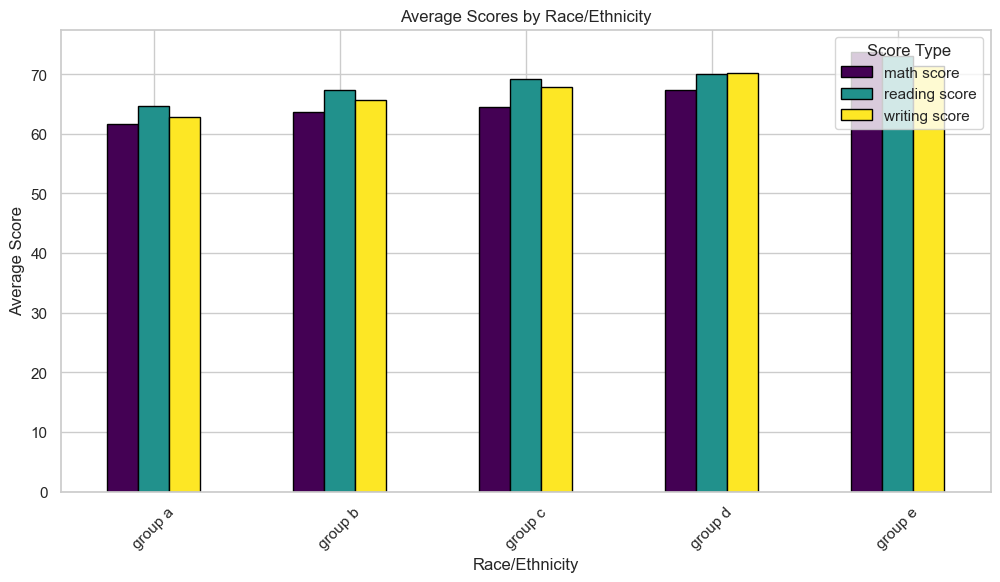

In [25]:
# 2. Race/Ethnicity & Scores - Grouped Bar Plot
plt.figure(figsize=(12, 6))
df_grouped = students.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean().reset_index()
df_grouped.plot(x="race/ethnicity", kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Average Scores by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.legend(title="Score Type")
plt.show()

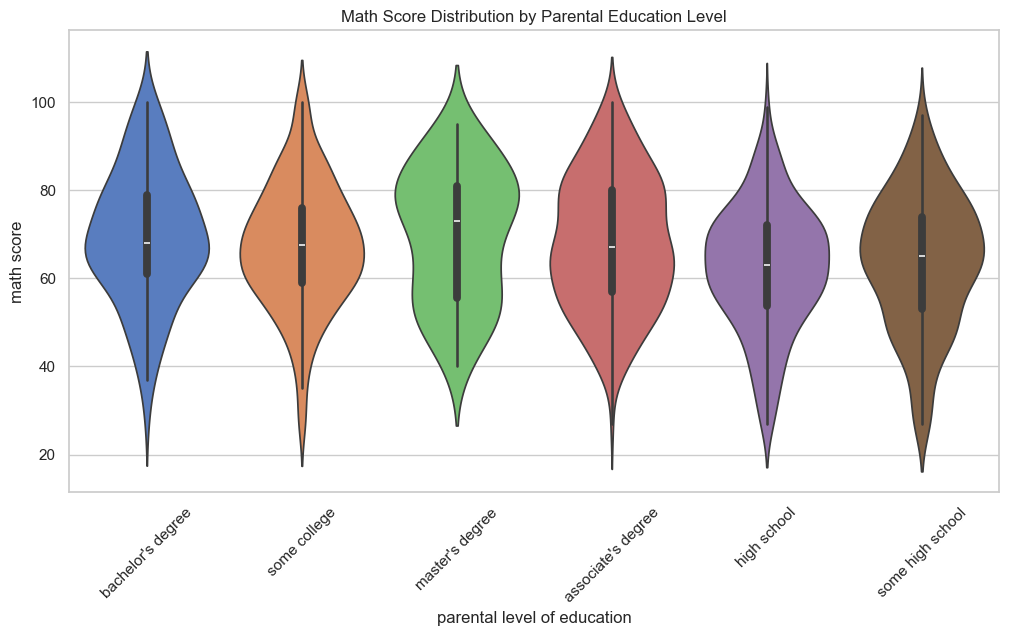

In [26]:
# 3. Parental Education & Scores - Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="parental level of education", y="math score", data=students, palette="muted")
plt.title("Math Score Distribution by Parental Education Level")
plt.xticks(rotation=45)
plt.show()

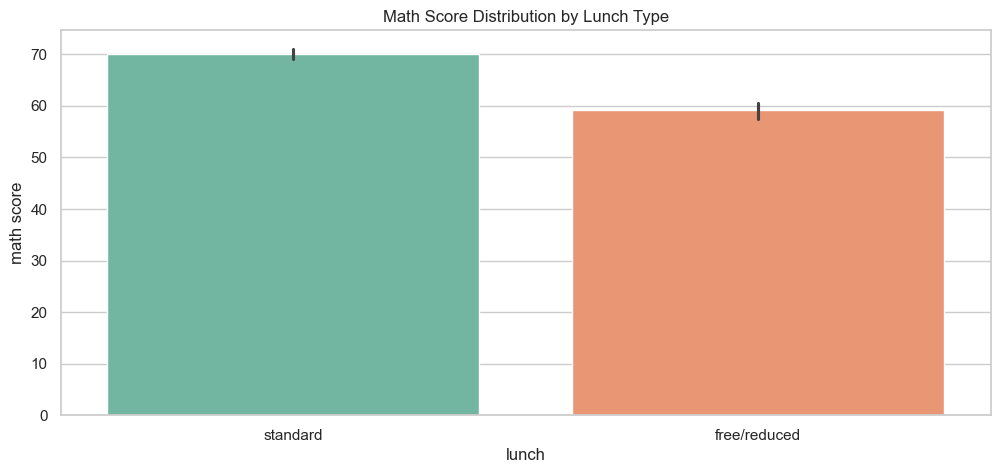

In [27]:
# 4. Lunch Type & Scores - Box Plot
plt.figure(figsize=(12, 5))
sns.barplot(x="lunch", y="math score", data=students, palette="Set2")
plt.title("Math Score Distribution by Lunch Type")
plt.show()

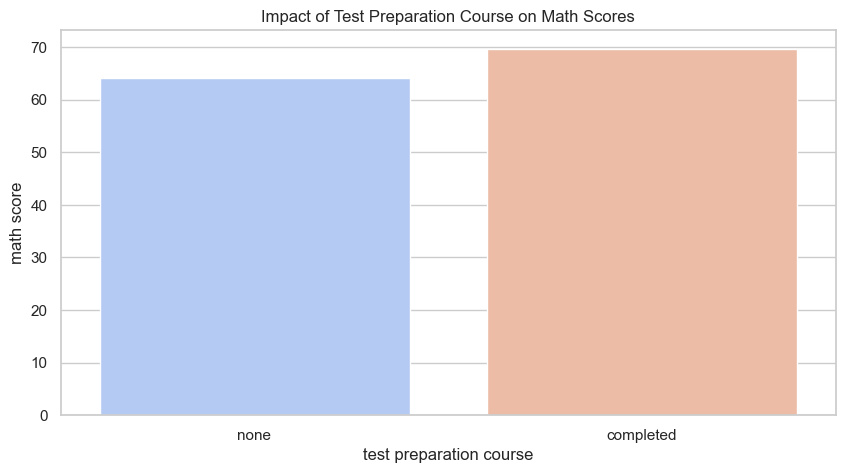

In [28]:
# 5. Test Preparation Course & Scores - Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="test preparation course", y="math score", data=students, palette="coolwarm", ci=None)
plt.title("Impact of Test Preparation Course on Math Scores")
plt.show()

# 5. Hypothesis Testing

1. Gender & Scores (Independent Samples t-test)
> Null Hypothesis (H₀): There is no significant difference in scores between male and female students.
> Alternative Hypothesis (H₁): There is a significant difference in scores between male and female students.
> Test: Independent t-test for math, reading, and writing scores.

2. Race/Ethnicity & Scores (One-Way ANOVA)
> H₀: The mean scores across different ethnic groups are the same.

> H₁: At least one ethnic group has a different mean score.

> Test: One-Way ANOVA to compare mean scores across ethnic groups.

3. Parental Education & Scores (One-Way ANOVA)
> H₀: There is no significant difference in scores based on parental education level.

> H₁: There is a significant difference.

> Test: One-Way ANOVA.

4. Lunch Type & Scores (Independent Samples t-test)
> H₀: Students with free/reduced lunch and standard lunch have the same mean scores.

> H₁: There is a significant difference.

> Test: Independent t-test.

5. Test Preparation Course & Scores (Independent Samples t-test)
> H₀: Completing the test prep course does not significantly improve scores.

> H₁: It significantly improves scores.

> Test: Independent t-test.

In [29]:
# 1. Gender & Scores (t-test)
male_scores = students [students['gender'] == 'male'][['math score', 'reading score', 'writing score']]
female_scores = students[students['gender'] == 'female'][['math score', 'reading score', 'writing score']]

for subject in ['math score', 'reading score', 'writing score']:
    t_stat, p_val = stats.ttest_ind(male_scores[subject], female_scores[subject], equal_var=False)
    print(f"{subject}: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

math score: t-statistic = 5.320, p-value = 0.000
reading score: t-statistic = -8.026, p-value = 0.000
writing score: t-statistic = -10.080, p-value = 0.000


In [30]:
# 2. Race/Ethnicity & Scores (ANOVA)
for subject in ['math score', 'reading score', 'writing score']:
    groups = [students[students['race/ethnicity'] == grp][subject] for grp in students['race/ethnicity'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{subject} by Race: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}")

math score by Race: F-statistic = 14.694, p-value = 0.000
reading score by Race: F-statistic = 5.614, p-value = 0.000
writing score by Race: F-statistic = 7.146, p-value = 0.000


In [31]:
# Parental Education & Scores (ANOVA)
for subject in ['math score', 'reading score', 'writing score']:
    groups = [students[students['parental level of education'] == edu][subject] for edu in students['parental level of education'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{subject} by Parental Education: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}")

math score by Parental Education: F-statistic = 6.410, p-value = 0.000
reading score by Parental Education: F-statistic = 9.263, p-value = 0.000
writing score by Parental Education: F-statistic = 14.436, p-value = 0.000


In [32]:
# 4. Lunch Type & Scores (t-test)
for subject in ['math score', 'reading score', 'writing score']:
    standard = students[students['lunch'] == 'standard'][subject]
    reduced = students[students['lunch'] == 'free/reduced'][subject]
    t_stat, p_val = stats.ttest_ind(standard, reduced, equal_var=False)
    print(f"{subject} by Lunch Type: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

math score by Lunch Type: t-statistic = 11.588, p-value = 0.000
reading score by Lunch Type: t-statistic = 7.288, p-value = 0.000
writing score by Lunch Type: t-statistic = 7.847, p-value = 0.000


In [33]:
### 5. Test Preparation Course & Scores (t-test)
for subject in ['math score', 'reading score', 'writing score']:
    completed = students[students['test preparation course'] == 'completed'][subject]
    none = students[students['test preparation course'] == 'none'][subject]
    t_stat, p_val = stats.ttest_ind(completed, none, equal_var=False)
    print(f"{subject} by Test Prep: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

math score by Test Prep: t-statistic = 5.741, p-value = 0.000
reading score by Test Prep: t-statistic = 7.980, p-value = 0.000
writing score by Test Prep: t-statistic = 10.739, p-value = 0.000


In [34]:
# Function for Cohen's d
def cohens_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    pooled_sd = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return diff / pooled_sd

# Cohen’s d for Gender
for subject in ['math score', 'reading score', 'writing score']:
    d = cohens_d(male_scores[subject], female_scores[subject])
    print(f"Cohen's d for {subject} (Gender): {d:.3f}")

# Eta squared for ANOVA
def eta_squared(f_stat, df_between, df_within):
    return f_stat * df_between / (f_stat * df_between + df_within)

# Compute eta squared for Race/Ethnicity
df_between = len(students['race/ethnicity'].unique()) - 1
df_within = len(students) - df_between - 1  # Approximate
for subject in ['math score', 'reading score', 'writing score']:
    f_stat, _ = stats.f_oneway(*[students[students['race/ethnicity'] == grp][subject] for grp in students['race/ethnicity'].unique()])
    eta_sq = eta_squared(f_stat, df_between, df_within)
    print(f"Eta Squared for {subject} (Race): {eta_sq:.3f}")


Cohen's d for math score (Gender): 0.336
Cohen's d for reading score (Gender): -0.508
Cohen's d for writing score (Gender): -0.637
Eta Squared for math score (Race): 0.056
Eta Squared for reading score (Race): 0.022
Eta Squared for writing score (Race): 0.028


#### Interpretation 
- Cohen’s d Interpretation
> 0.2 → Small Effect
0.5 → Medium Effect
0.8+ → Large Effect
>
- Eta Squared Interpretation
> 0.01 → Small Effect
0.06 → Medium Effect
0.14+ → Large Effect

# 6. Machine Learning

## 6.1 Data Preprocessing

In [35]:
# Creating a copy
df = students.copy()

In [36]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [37]:
# Define features (X) and target variables (y)
X = df.drop(columns=['math score', 'reading score', 'writing score'])  # Independent variables
y_math = df['math score']
y_reading = df['reading score']
y_writing = df['writing score']

In [38]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Split data into training and test sets
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
X_train, X_test, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
X_train, X_test, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

## 6.1 Model Evaluation

In [40]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")
    # return y_pred

In [41]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_math)
evaluate_model(lin_reg, X_test, y_test_math, "Linear Regression (Math Score)")

Linear Regression (Math Score) Performance:
R² Score: 0.1644
MAE: 11.0556
RMSE: 13.7488



In [42]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train_math)
evaluate_model(dt_reg, X_test, y_test_math, "Decision Tree (Math Score)")

Decision Tree (Math Score) Performance:
R² Score: -0.1145
MAE: 12.6525
RMSE: 15.8788



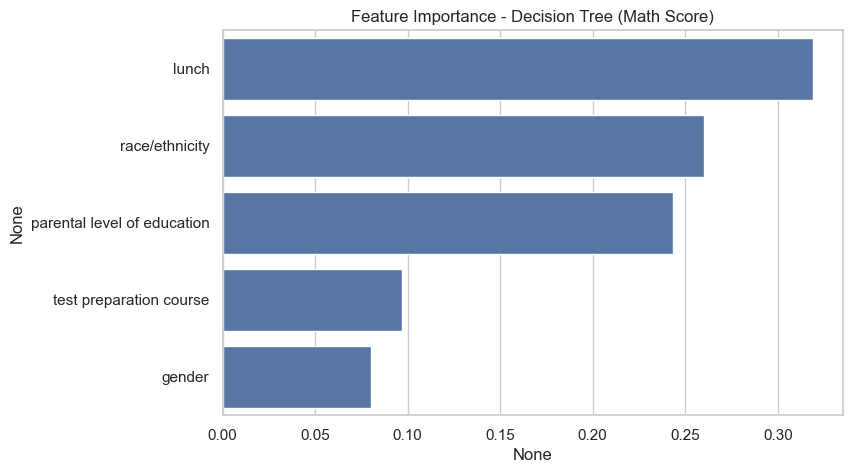

In [43]:
# Feature Importance for Decision Tree
feature_importance_dt = pd.Series(dt_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index)
plt.title("Feature Importance - Decision Tree (Math Score)")
plt.show()

In [44]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train_math)
evaluate_model(rf_reg, X_test, y_test_math, "Random Forest (Math Score)")

Random Forest (Math Score) Performance:
R² Score: -0.0277
MAE: 12.1836
RMSE: 15.2481



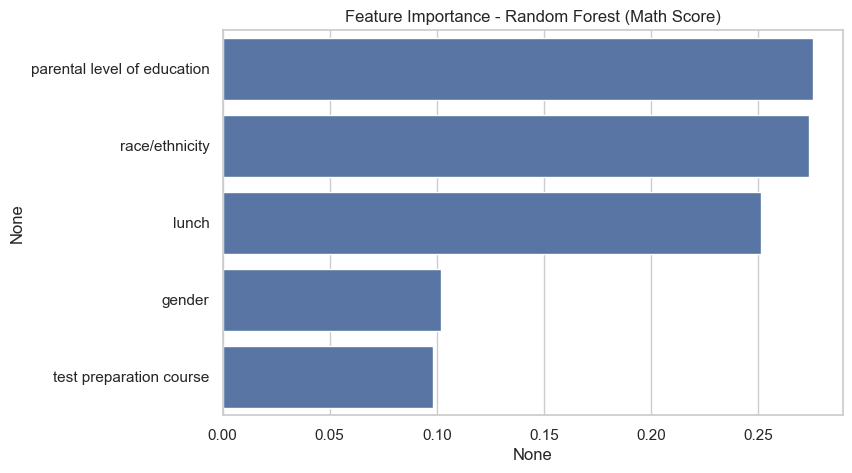

In [45]:
# Feature Importance for Random Forest
feature_importance_rf = pd.Series(rf_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index)
plt.title("Feature Importance - Random Forest (Math Score)")
plt.show()

In [46]:
# XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train_math)
evaluate_model(xgb_reg, X_test, y_test_math, "XGBoost (Math Score)")

XGBoost (Math Score) Performance:
R² Score: -0.0782
MAE: 12.4177
RMSE: 15.6178



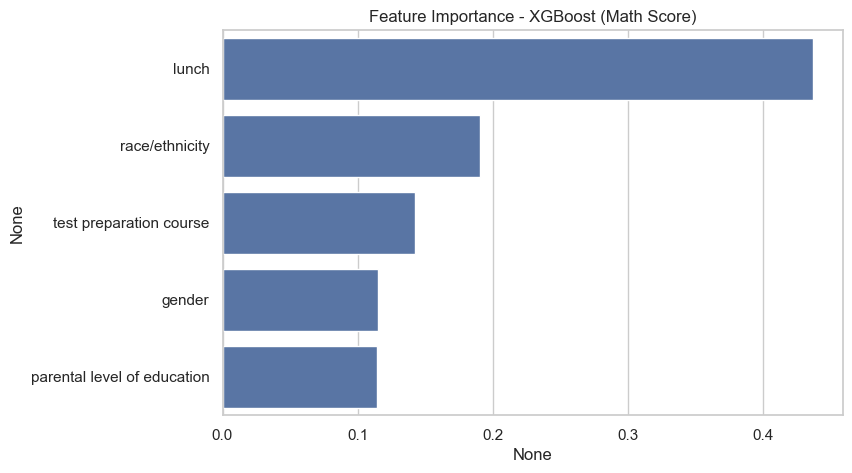

In [47]:
# Feature Importance for XGBoost
feature_importance_xgb = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index)
plt.title("Feature Importance - XGBoost (Math Score)")
plt.show()